In [1]:
#due to error InternalError: Blas GEMM launch failed 
#Patch for error
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


In [2]:

import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Using TensorFlow backend.


In [3]:
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
from keras.layers import Dense
from keras.layers import Activation

In [5]:
class_labels = ["Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine"]


In [6]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [7]:
xtrain.shape

(60000, 28, 28)

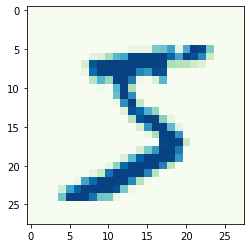

In [8]:
plt.imshow(xtrain[0],cmap='GnBu')

In [9]:
ytrain[0]

5

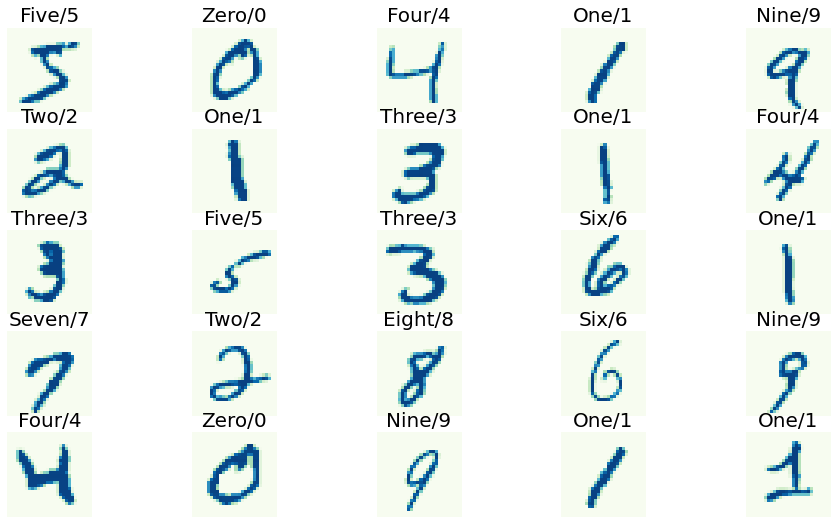

In [10]:
plt.figure(figsize=(16,9))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(xtrain[i],cmap='GnBu')
    plt.axis('off')
    plt.title(class_labels[ytrain[i]]+"/"+str(ytrain[i]),fontsize=20)
    

In [11]:
#feature scaling
xtrain=xtrain/255.0
xtest=xtest/255.0

In [12]:
#Build NN
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')])


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 15s 255us/step - loss: 0.2958 - accuracy: 0.9140
Epoch 2/5
60000/60000 [==============================] - 15s 245us/step - loss: 0.1438 - accuracy: 0.9579
Epoch 3/5
60000/60000 [==============================] - 15s 245us/step - loss: 0.1073 - accuracy: 0.9668
Epoch 4/5
60000/60000 [==============================] - 15s 246us/step - loss: 0.0860 - accuracy: 0.9733
Epoch 5/5
60000/60000 [==============================] - 15s 245us/step - loss: 0.0733 - accuracy: 0.9768


In [17]:
model.evaluate(xtest,ytest)[1]

10000/10000 [==============================] - 2s 177us/step


0.9768999814987183

In [18]:
ypred=model.predict(xtest)

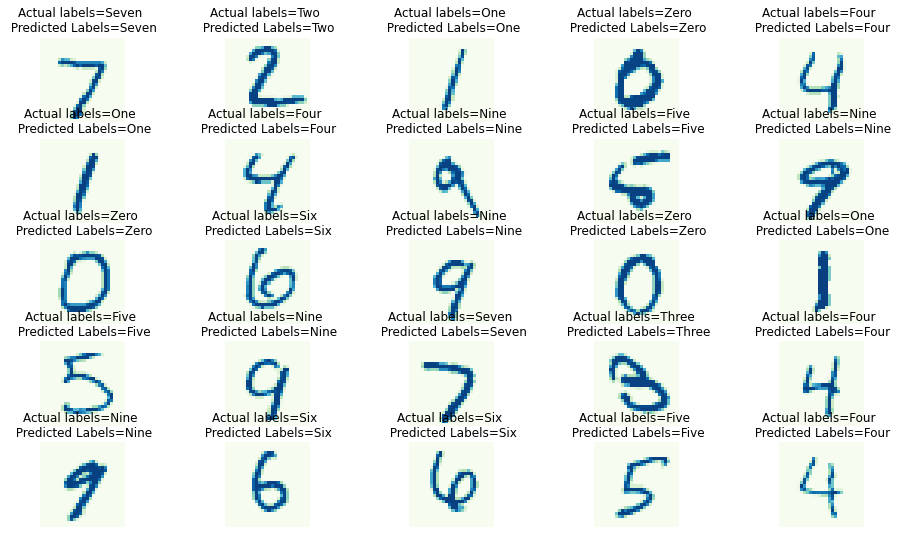

In [29]:
plt.figure(figsize=(16,9))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(xtest[i],cmap='GnBu')
    plt.axis('off')
    plt.title('Actual labels={} \n Predicted Labels={}'.format(class_labels[ytest[i]],class_labels[np.argmax(ypred[i])]))
    

In [19]:
cm=confusion_matrix(ytest,[np.argmax(i) for i in ypred])

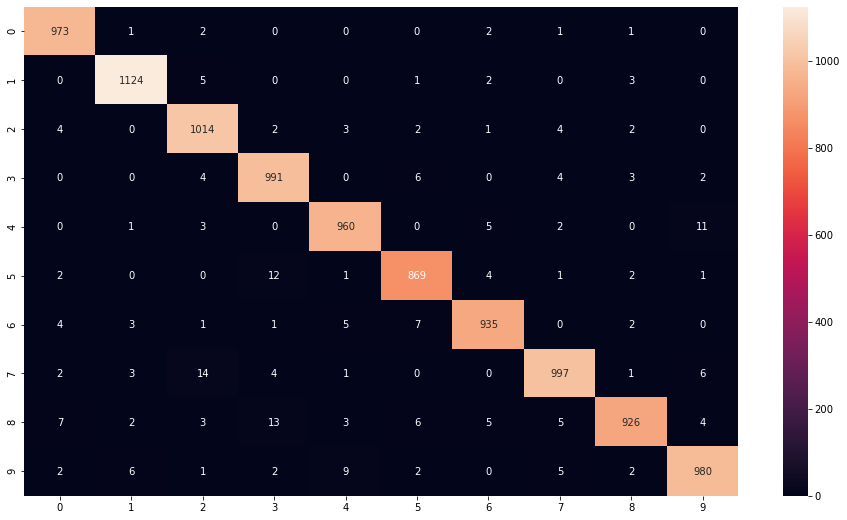

In [21]:
plt.figure(figsize=(16,9))
sns.heatmap(cm,annot=True,fmt='d')

In [23]:
cr=classification_report(ytest,[np.argmax(i) for i in ypred],target_names=class_labels)

In [24]:
print(cr)

              precision    recall  f1-score   support

        Zero       0.98      0.99      0.99       980
         One       0.99      0.99      0.99      1135
         Two       0.97      0.98      0.98      1032
       Three       0.97      0.98      0.97      1010
        Four       0.98      0.98      0.98       982
        Five       0.97      0.97      0.97       892
         Six       0.98      0.98      0.98       958
       Seven       0.98      0.97      0.97      1028
       Eight       0.98      0.95      0.97       974
        Nine       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [30]:
model.save('handwrittendigitclassifier.h5')